# Process experimental data (fruit metabolite concentrations)



Processing GLC...


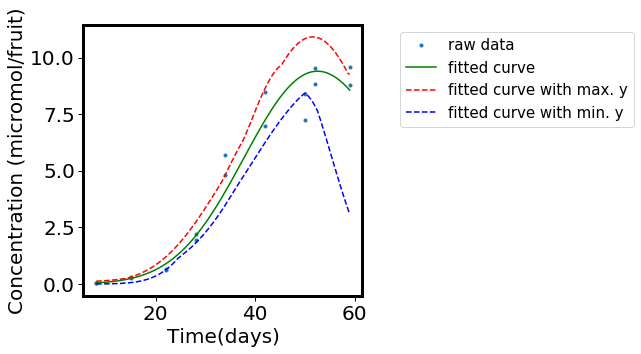

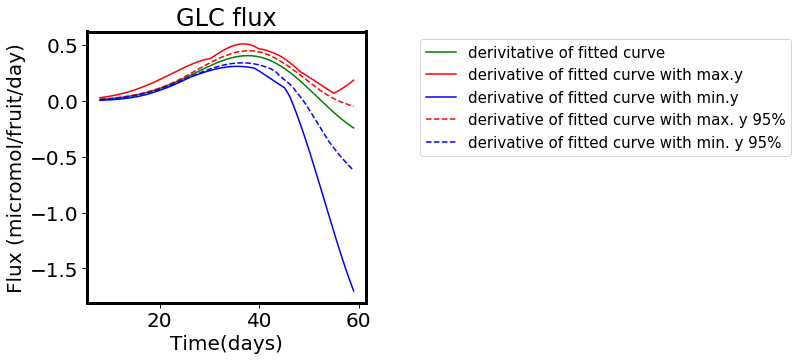

Processing FRU...


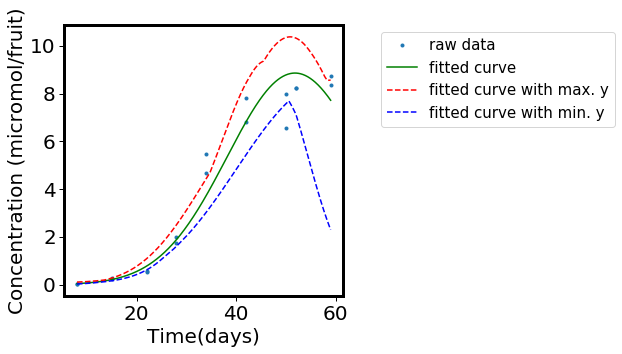

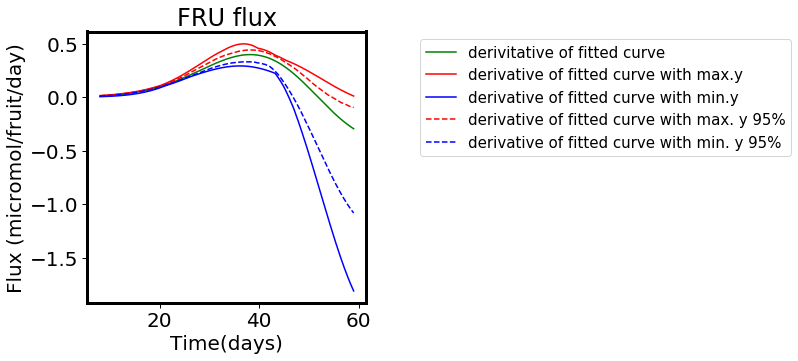

Processing SUC...


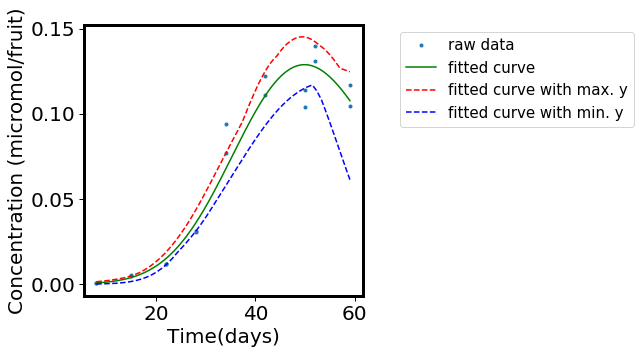

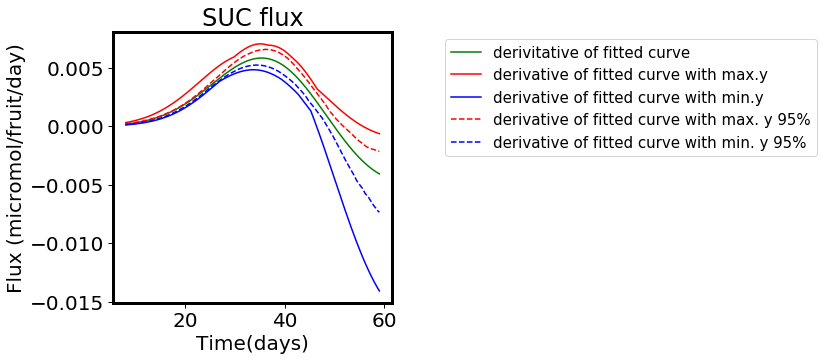

Processing MAL...


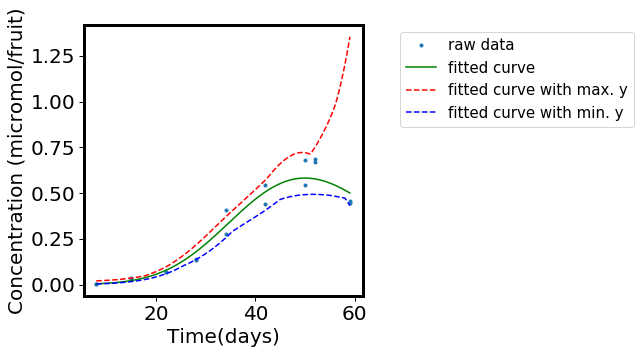

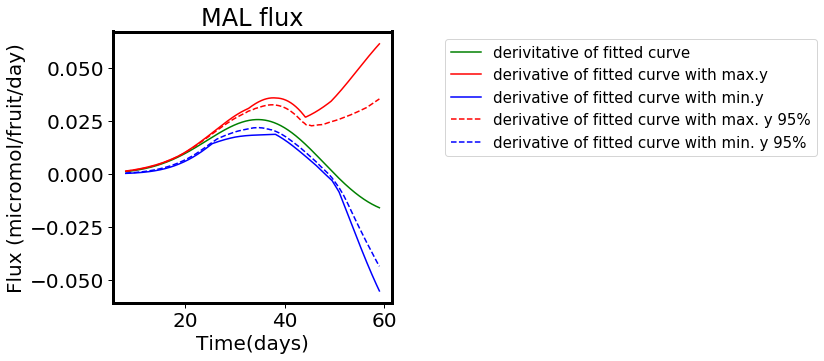

Processing CIT...


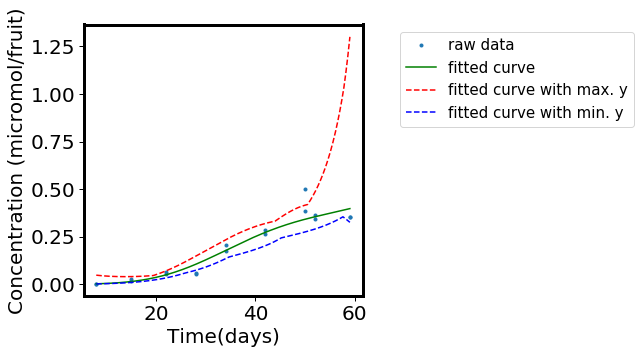

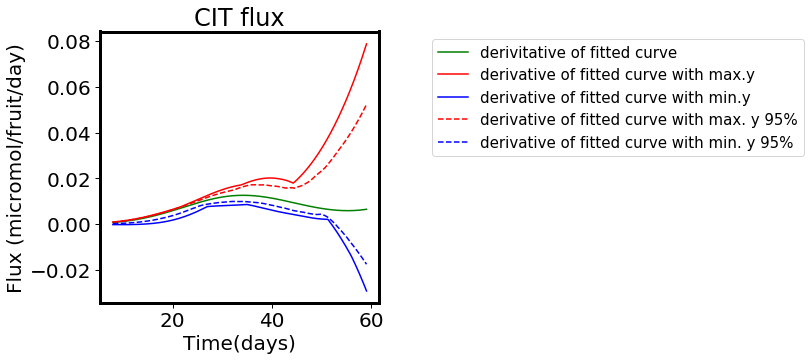

Processing L_ALPHA_ALANINE...


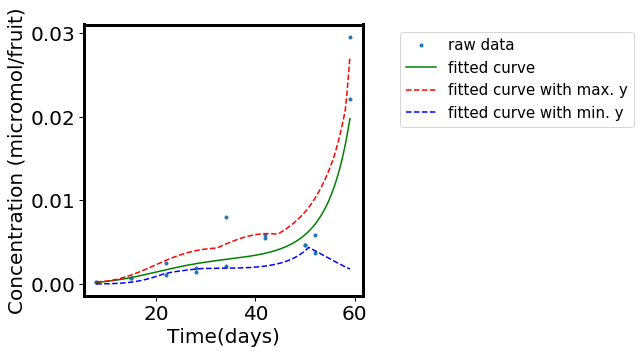

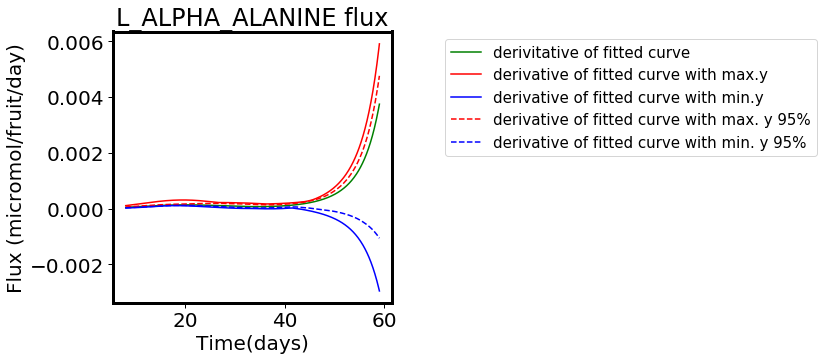

Processing ASN...


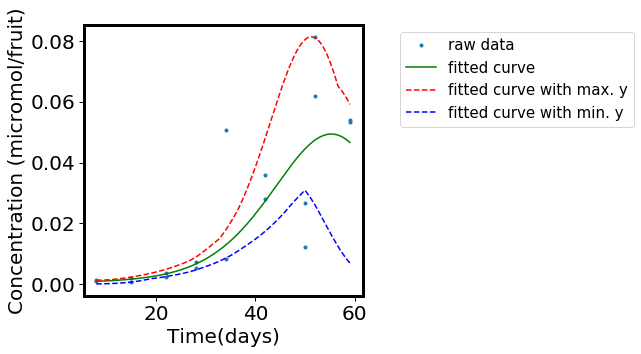

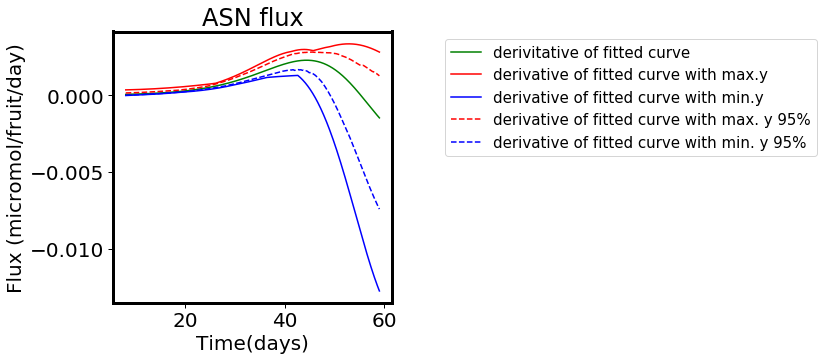

Processing L_ASPARTATE...


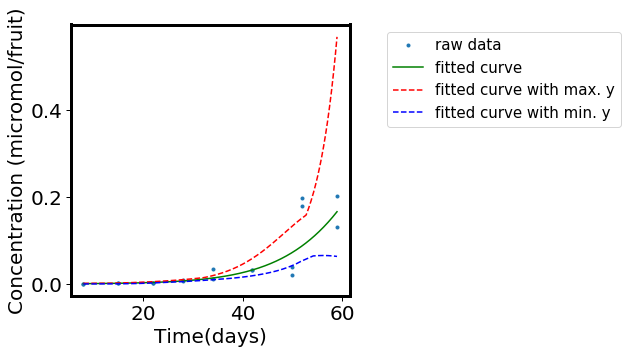

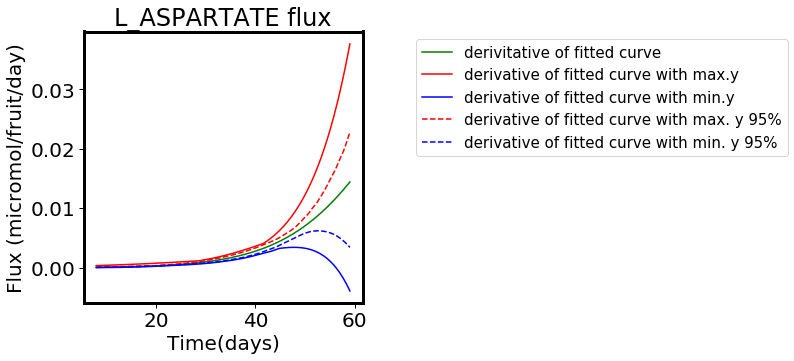

Processing GABA...


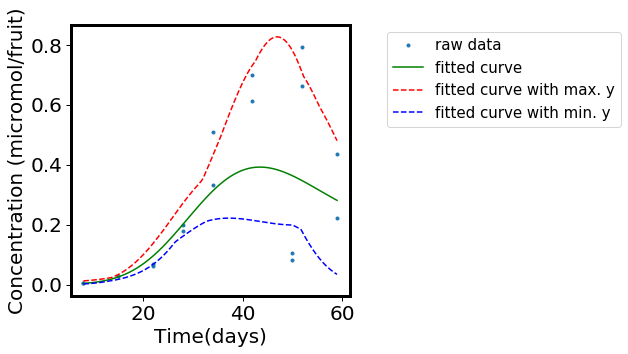

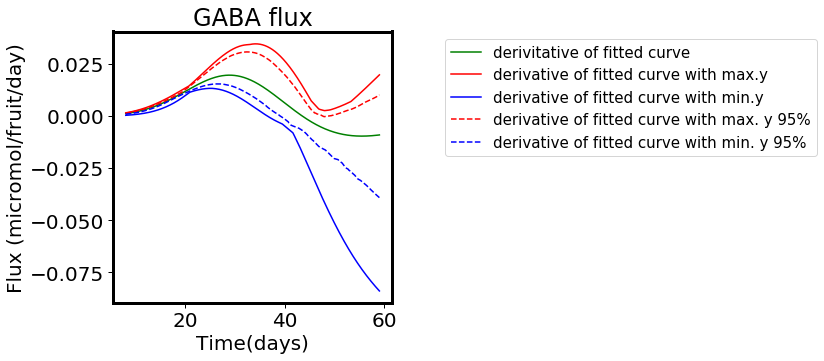

Processing GLT...


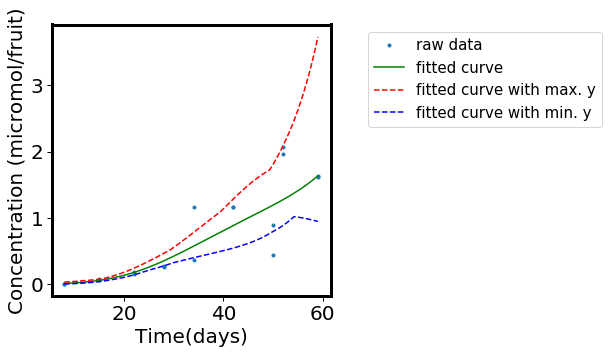

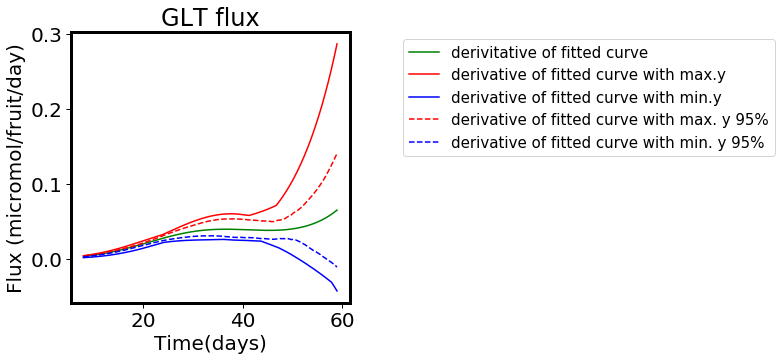

Processing GLN...


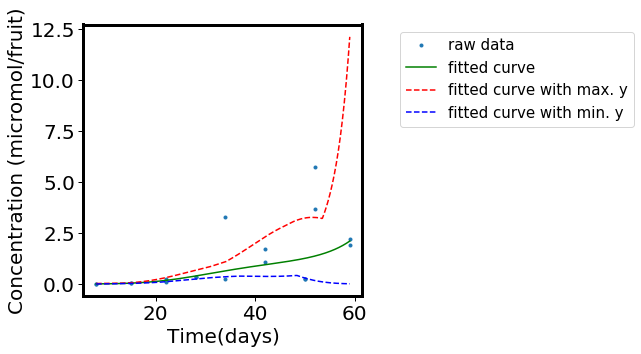

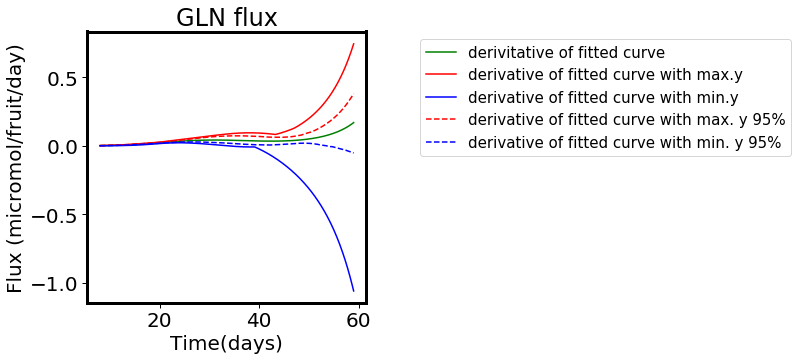

Processing GLY...


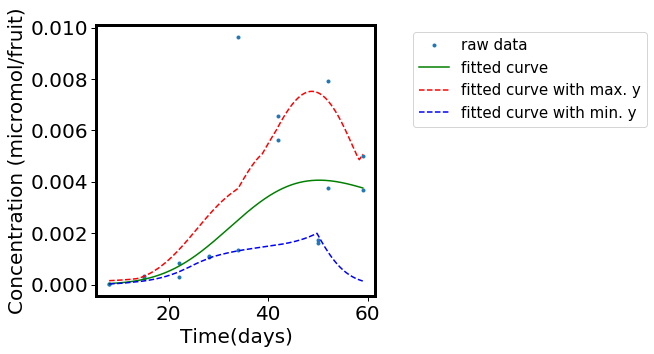

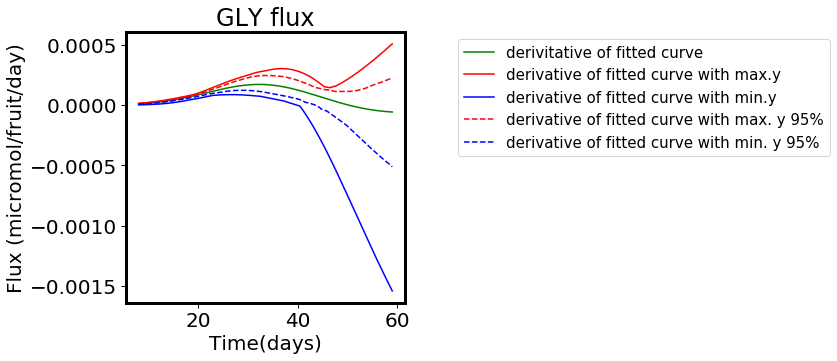

Processing ILE...


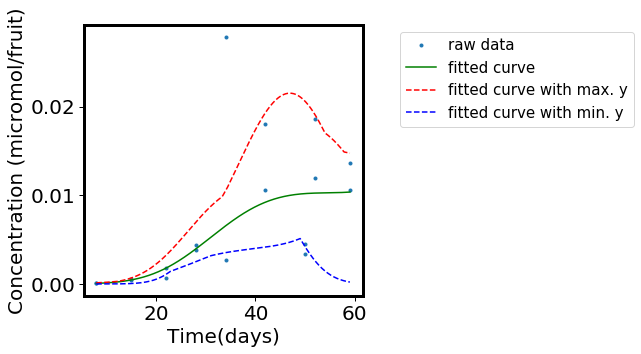

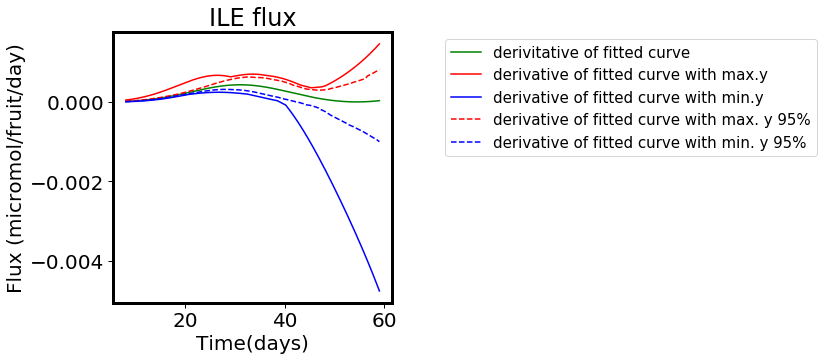

Processing LYS...


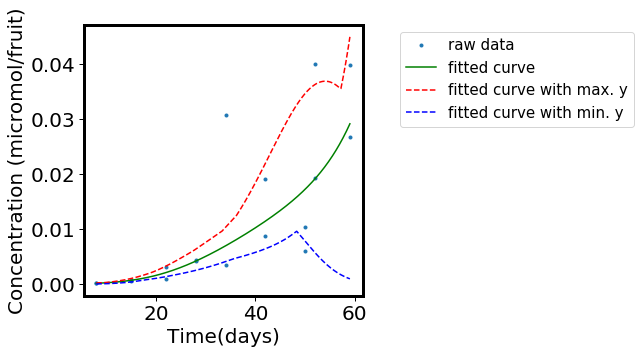

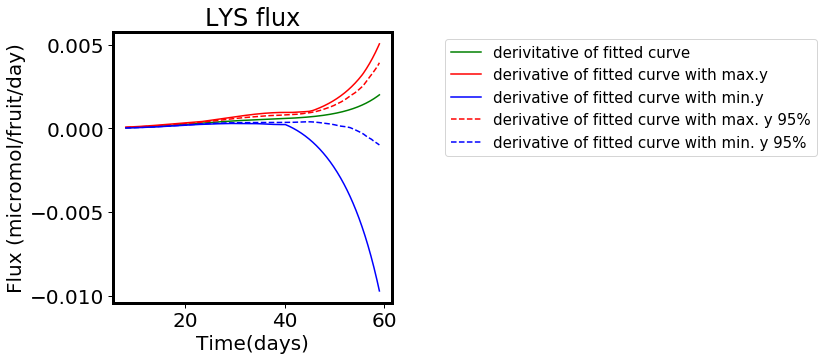

Processing MET...


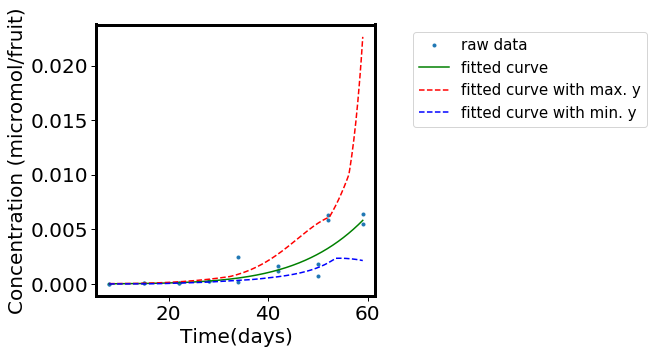

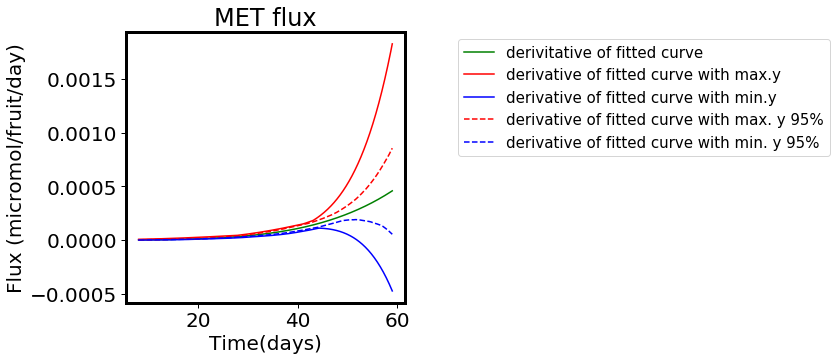

Processing PHE...


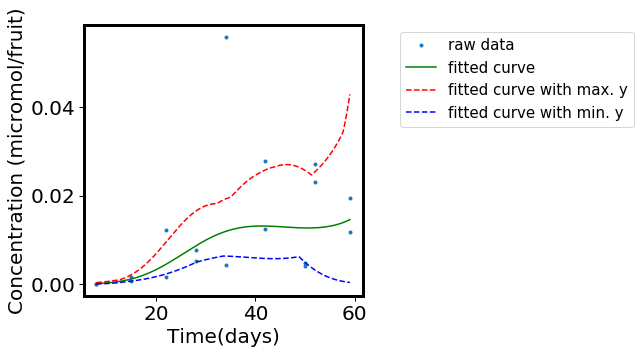

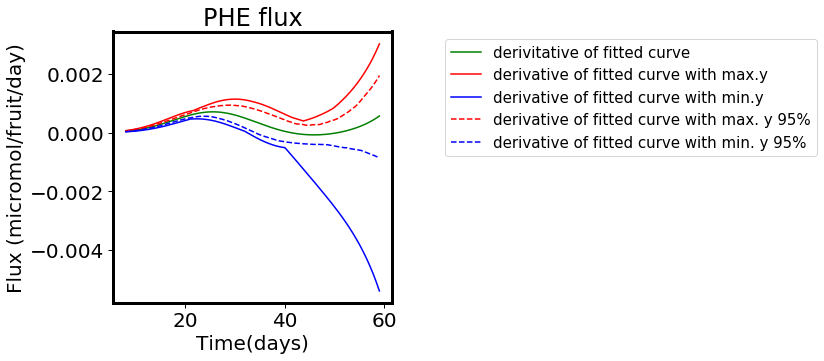

Processing PRO...


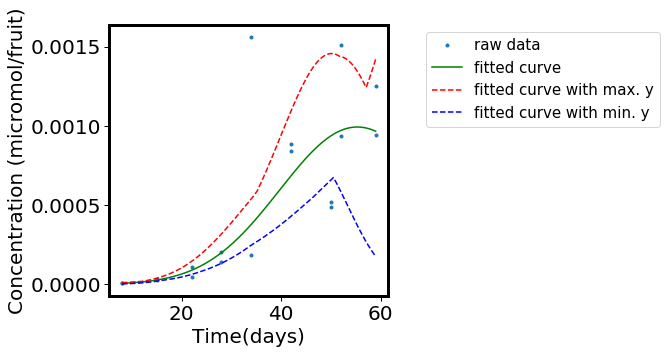

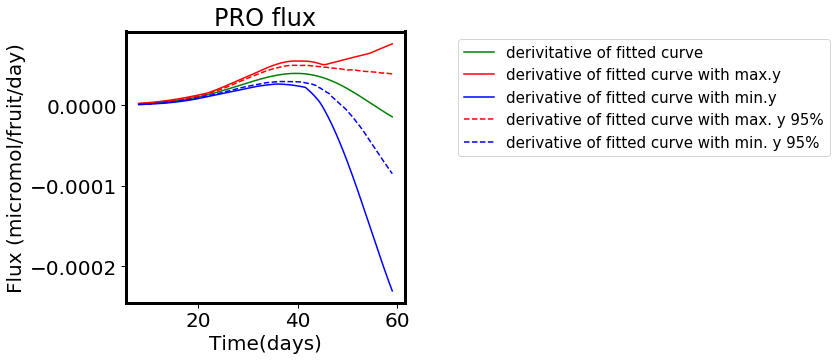

Processing SER...


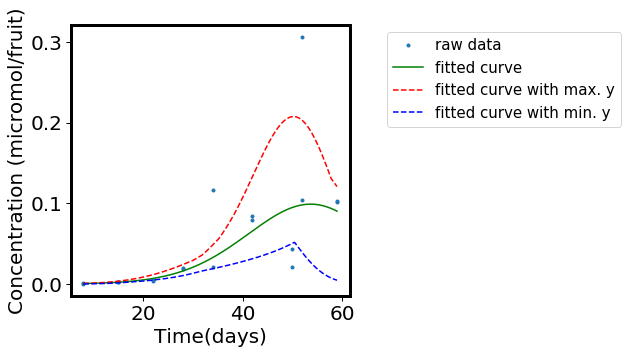

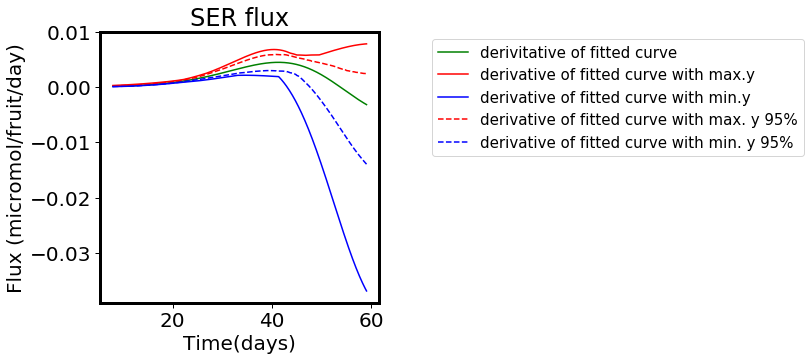

Processing THR...


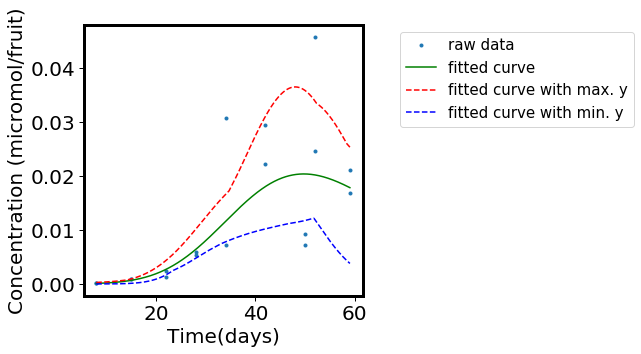

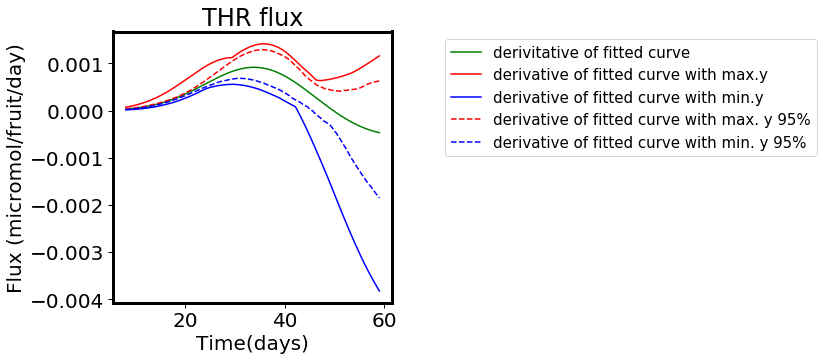

Processing TRP...


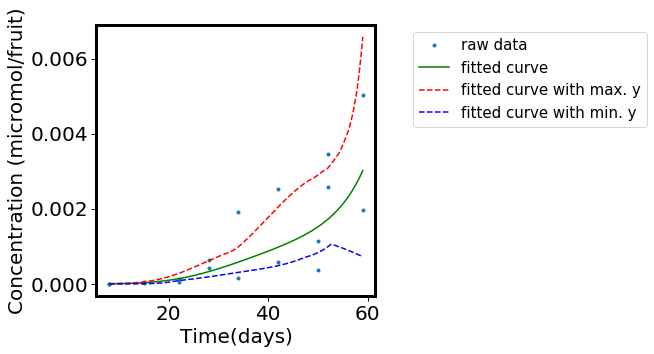

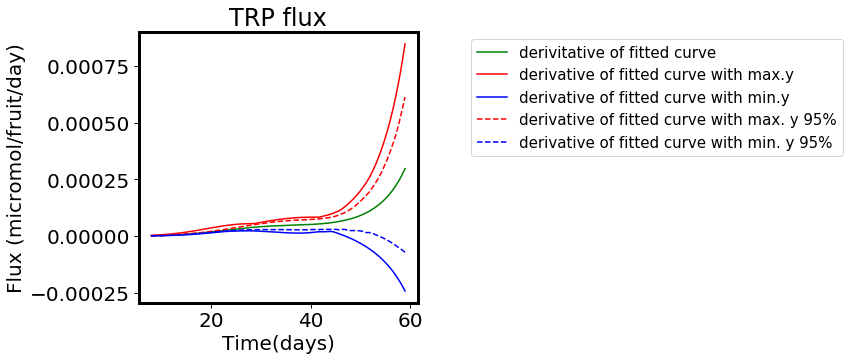

Processing TYR...


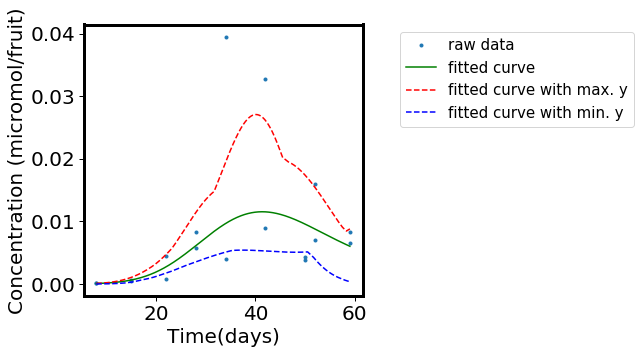

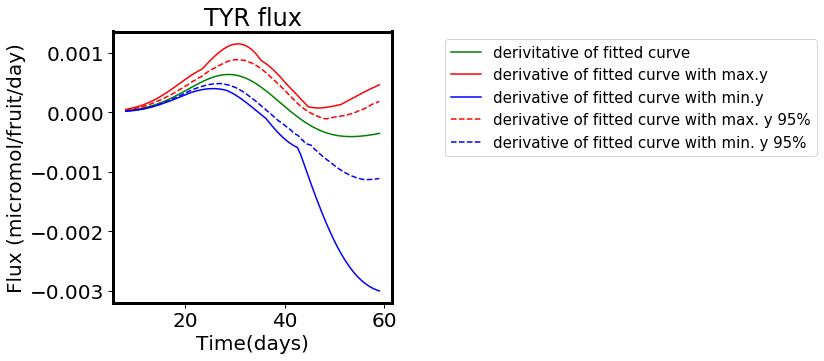

Processing VAL...


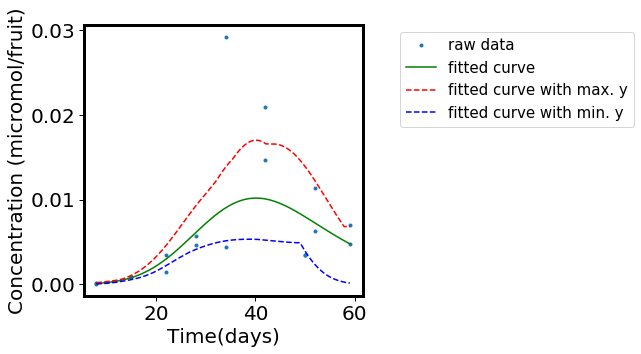

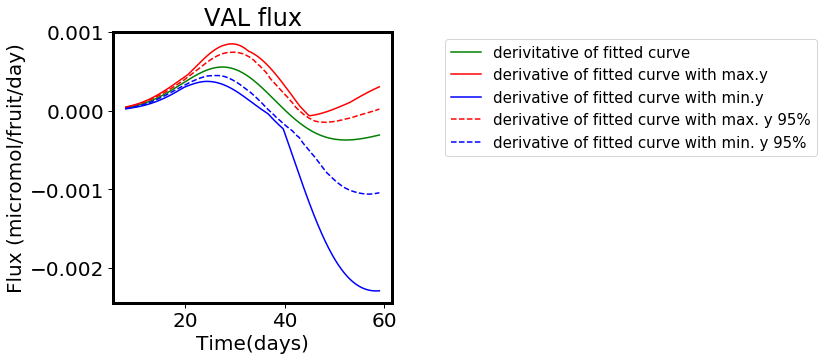

Processing Pi...


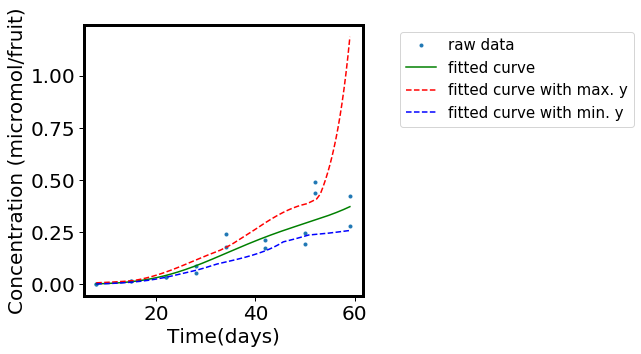

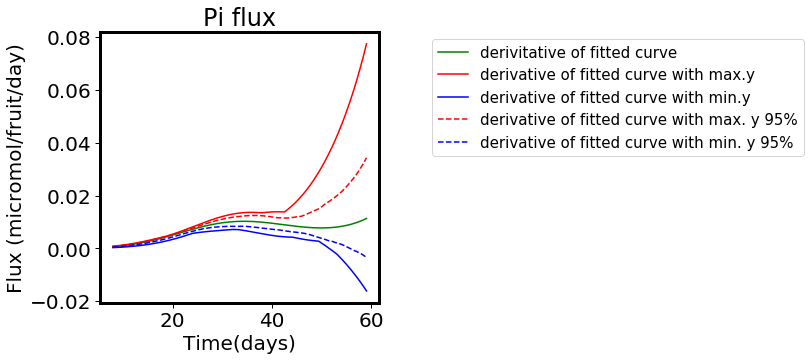

Processing FUM...


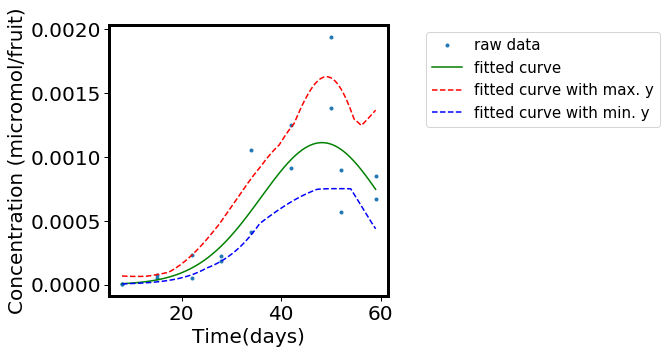

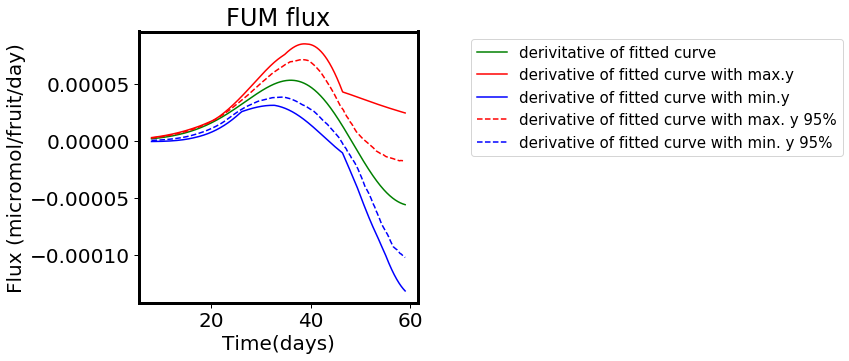

Processing STARCH...


In [1]:
%matplotlib inline
import numpy as np
from studyFunctions import generateBoundsFromBiomass
#Day time points of interest
DAA = list(np.linspace(8,59,11))

mets = ("GLC","FRU","SUC","MAL","CIT","L_ALPHA_ALANINE","ASN","L_ASPARTATE","GABA","GLT",
        "GLN","GLY","ILE","LYS","MET","PHE","PRO","SER","THR","TRP","TYR","VAL","Pi","FUM")
#mets = ("GLC",)
dfile="Data/Data_OrganicSolutes.csv"
Nsampl= 1000
Ssampl= 0.80

conc = dict()
conc_max =dict()
conc_min = dict()
flux_max = dict()
flux_min = dict()

for met in mets:
  print "Processing "+met+"..."
  [conc[met],conc_max[met],conc_min[met],flux_max[met],flux_min[met]]=generateBoundsFromBiomass(datafile = dfile,
                                                                                                met=met,
                                                                                                Nsampling=Nsampl,
                                                                                                DPA=DAA,
                                                                                                show_plots=True,
                                                                                                degree=3,
                                                                                                Ssampling=Ssampl,
                                                                                                start=8,stop=59)


mets = ("STARCH",)
dfile="Data/Data_Starch_Protein.csv"
Nsampl= 1000
Ssampl= 0.80

for met in mets:
  print "Processing "+met+"..."
  [conc[met],conc_max[met],conc_min[met],flux_max[met],flux_min[met]]=generateBoundsFromBiomass(datafile = dfile,
                                                                                                met=met,
                                                                                                Nsampling=Nsampl,
                                                                                                DPA=DAA,
                                                                                                show_plots=False,
                                                                                                degree=3,
                                                                                                Ssampling=Ssampl,
                                                                                                start=8,stop=59)



### Export processed data

In [2]:

mets = conc.keys()

fout = open("Data/ProcessedData_OrganicSolutes_Starch.csv","w")
fout.write("DPA")
for met in mets:
  fout.write("\t"+met)

fout.write("\n")

for i in range(0,len(DAA)):
  fout.write(str(DAA[i]))
  for met in mets:
    fout.write("\t"+str(conc[met][i]))
  
  fout.write("\n")

fout.close()
